In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt


%matplotlib inline
 
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [2]:
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


In [3]:
df.drop(df.columns[0],inplace=True, axis=1)

In [4]:
df.isna().sum()  #Title has 2966 NaN values

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
# Removing rows with NaN for below colnames
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]

In [6]:
df['Division Name'].value_counts()

General           13365
General Petite     7837
Initmates          1426
Name: Division Name, dtype: int64

In [7]:
len(df['Class Name'].unique())

20

In [8]:
df['Title'].isnull().sum()

2966

In [9]:
# Extracting Unique Count by Column
uni_count = []
for x in df.columns:
    uni_count.append([x,len(df[x].unique())])

In [10]:
uni_count

[['Clothing ID', 1172],
 ['Age', 77],
 ['Title', 13984],
 ['Review Text', 22621],
 ['Rating', 5],
 ['Recommended IND', 2],
 ['Positive Feedback Count', 82],
 ['Division Name', 3],
 ['Department Name', 6],
 ['Class Name', 20]]

In [11]:
df['Review Text'][1]

'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [12]:
df['Review Text'][0]

'Absolutely wonderful - silky and sexy and comfortable'

In [13]:
# Create New Variables: 
# Word Length
df["Word Count"] = df['Review Text'].str.split().apply(len)

In [14]:
# Character Length
df["Character Count"] = df['Review Text'].apply(len)

In [15]:
#Class: Bad when Rating <=3, Class: Good otherwise
df["class"] = 1
df.loc[df.Rating <= 3,["class"]] = 0

In [16]:
df.head(6)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Character Count,class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,8,53,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,62,303,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,98,500,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,22,124,1
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,36,192,1
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,98,488,0


In [17]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Word Count,Character Count,class
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,919.695908,43.282880,4.183092,0.818764,2.631784,60.211950,308.761534,0.770506
std,201.683804,12.328176,1.115911,0.385222,5.787520,28.533053,143.934126,0.420517
min,1.000000,18.000000,1.000000,0.000000,0.000000,2.000000,9.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,36.000000,186.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,59.000000,302.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,88.000000,459.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,115.000000,508.000000,1.000000


In [18]:
df['class'].value_counts()  #distribution

1    17435
0     5193
Name: class, dtype: int64

Text(0.5, 1.0, 'Count per Deparment name')

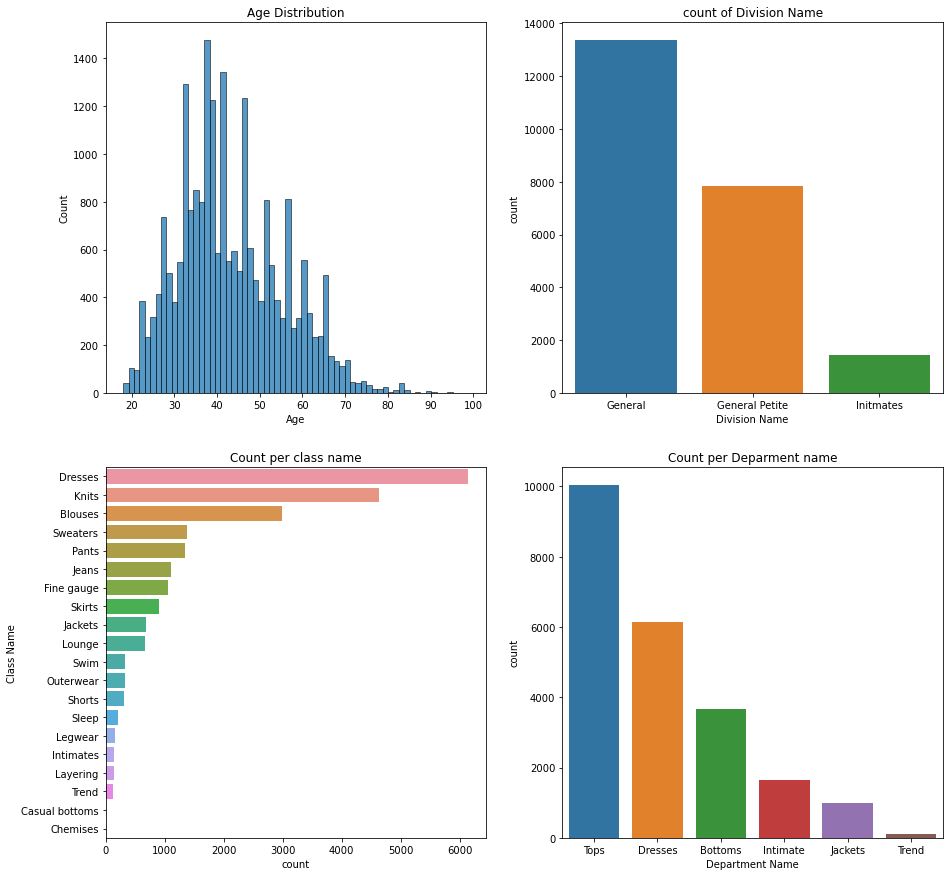

In [19]:
# Continous Distributions
fig, axes = plt.subplots(2,2,figsize=(15,15))
sns.histplot(df.Age, ax=axes[0,0])
axes[0,0].set_title("Age Distribution")

sns.countplot(x="Division Name",data= df, order = df["Division Name"].value_counts().index, ax=axes[0,1])
axes[0,1].set_title("count of Division Name")

sns.countplot(y="Class Name", data= df, order= df["Class Name"].value_counts().index, ax=axes[1,0])
axes[1,0].set_title("Count per class name")

sns.countplot(x= "Department Name", data=df, order=df["Department Name"].value_counts().index, ax=axes[1,1])
axes[1,1].set_title("Count per Deparment name")

In [24]:
# split data
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
#BAG OF WORDS
cv = CountVectorizer(max_features = 7000, ngram_range=(1,3))
X_train = cv.fit_transform(train_data['Review Text'])
y_train = train_data['class']
X_test = cv.transform(test_data['Review Text'])
y_test = test_data['class']

In [25]:
cv.get_feature_names()[:20]

['00',
 '00p',
 '0p',
 '10',
 '10 12',
 '10 and',
 '10 in',
 '100',
 '105',
 '11',
 '110',
 '115',
 '115 lbs',
 '115lbs',
 '118',
 '12',
 '12 14',
 '12 and',
 '12 in',
 '120']

In [26]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 7000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
#logistic regression
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

In [ ]:
#naive Bayes
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

In [ ]:
#Decision tree
start=dt.datetime.now()
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

In [ ]:
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2['Naive Bayes'] = nb.predict(X_train)
df2['SVM'] = svm.predict(X_train)
df2['Decision tree'] = dtc.predict(X_train)
df2.head()

In [ ]:

pred_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_dtc = dtc.predict_proba(X_test)[:,1]
fpr_dtc,tpr_dtc,_ = roc_curve(y_test.values,pred_dtc)
roc_auc_dtc = auc(fpr_dtc,tpr_dtc)

pred_svm = svm.decision_function(X_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test.values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

In [ ]:
f, axes = plt.subplots(2, 2,figsize=(15,10))
axes[0,0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0,0].legend(loc='lower right', fontsize=13)

axes[0,1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[0,1].legend(loc='lower right', fontsize=13)

axes[1,0].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Support Vector Machine')
axes[1,0].legend(loc='lower right', fontsize=13)

axes[1,1].plot(fpr_dtc, tpr_dtc, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_dtc))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Decision Tree')
axes[1,1].legend(loc='lower right', fontsize=13);

In [ ]:
# preparation for the confusion matrix
df2['Logistic Regression'] = lr.predict(X_train)
pred_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)
lr_cmatrix  =confusion_matrix(y_test.values, lr.predict(X_test))
nb_cmatrix  =confusion_matrix(y_test.values, nb.predict(X_test))
svm_cmatrix =confusion_matrix(y_test.values, svm.predict(X_test))
dtc_cmatrix  =confusion_matrix(y_test.values, dtc.predict(X_test))

print("Linear Regression confusion matrix")
print(lr_cmatrix)

print("Naive Bayes confusion matrix")
print(nb_cmatrix)

print("Decision tree confusion matrix")
print(dtc_cmatrix)

print("Support Vector machine confusion matrix")
print(svm_cmatrix)

In [ ]:
print("Logistic Regression")
print(mt.classification_report(y_test, lr.predict(X_test)))
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n decision tree")
print(mt.classification_report(y_test, dtc.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))